# 线性回归

## 实现简单线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([1.,2.,3.,4.,5.])
y = np.array([1.,3.,2.,3.,5.])

[0, 6, 0, 6]

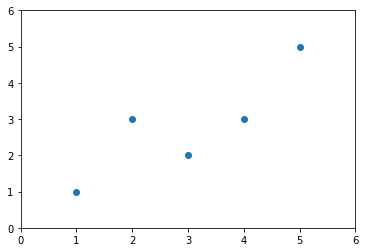

In [5]:
plt.scatter(X,y)
plt.axis([0,6,0,6])


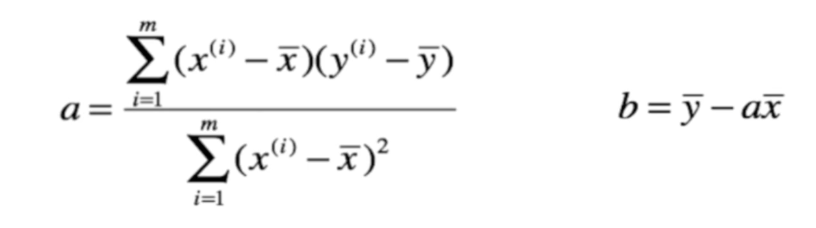

In [6]:
X_mean = np.mean(X)
y_mean = np.mean(y)

In [7]:
num = 0.0
d = 0.0
for X_i,y_i in zip(X,y):
    num += (X_i-X_mean) * (y_i - y_mean) 
    d += (X_i - X_mean) **2


In [8]:
a = num /d
b = y_mean -a*X_mean

In [9]:
a

0.8

In [10]:
b

0.39999999999999947

In [11]:
y_hat = a * X + b

[0, 6, 0, 6]

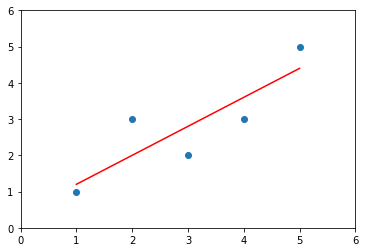

In [13]:
plt.scatter(X,y)
plt.plot(X,y_hat,color = 'r')
plt.axis([0,6,0,6])

In [14]:
X_predict = 6
y_predict = a * X_predict +b

In [15]:
y_predict

5.2

## 使用自己写的简单线性回归模型

In [19]:
from KNN.SimpleLinearRegression import SimpleLinearRegression1
reg1 = SimpleLinearRegression1()
reg1.fit(X,y)

SimpleLinearRegression1()

In [20]:
reg1.predict(np.array([X_predict]))

array([5.2])

In [21]:
reg1.a_


0.8

In [22]:
reg1.b_

0.39999999999999947

In [23]:
y_hat1 = reg1.predict(X)

[0, 6, 0, 6]

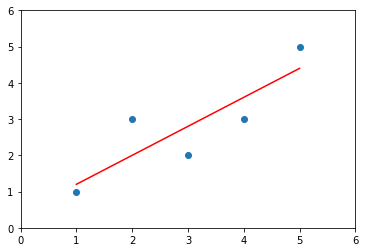

In [24]:
plt.scatter(X,y)
plt.plot(X,y_hat1,color = 'r')
plt.axis([0,6,0,6])

In [26]:
from KNN.SLR import SimpleLinearRegression2

In [27]:
reg2 = SimpleLinearRegression2()
reg2.fit(X,y)

SimpleLinearRegression2()

In [28]:
reg2.a_

0.8

In [29]:
reg2.b_

0.39999999999999947

[0, 6, 0, 6]

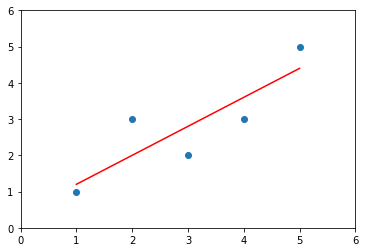

In [30]:
y_hat2 = reg2.predict(X)
plt.scatter(X,y)
plt.plot(X,y_hat1,color = 'r')
plt.axis([0,6,0,6])

## 向量化实现的性能测试

In [34]:
m = 1000
big_x = np.random.random(size= m)
big_y = big_x * 2.0 + 3.0 + np.random.normal(size = m)

In [35]:
%timeit reg1.fit(big_x,big_y)


1.46 ms ± 143 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [36]:
%timeit reg2.fit(big_x,big_y)

33.2 µs ± 775 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## 衡量回归算法的标准

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [38]:
boston = datasets.load_boston()

In [39]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [40]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [41]:
 x =boston.data[:,5] #只使用房间数量这个特征

In [42]:
x.shape

(506,)

In [43]:
y = boston.target

In [44]:
y.shape

(506,)

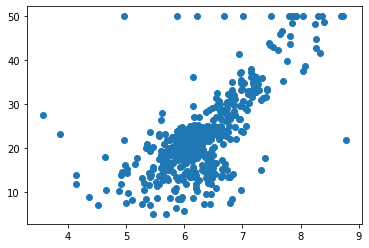

In [45]:
plt.scatter(x,y)

In [46]:
np.max(y)

50.0

In [47]:
x  =x[y<50]
y = y[y<50]

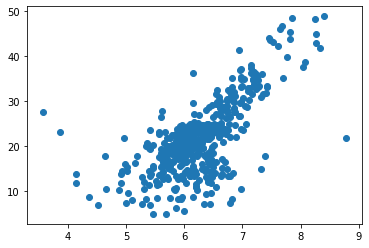

In [48]:
plt.scatter(x,y)

## 使用简单线性回归方法

In [49]:
from KNN.model_selection import train_test_spilt

In [50]:
x_train,x_test,y_train,y_test = train_test_spilt(
    x,y,seed =666)

In [51]:
x_train.shape

(392,)

In [52]:
x_test.shape

(98,)

In [53]:
from KNN.SLR import SimpleLinearRegression2

In [54]:
reg = SimpleLinearRegression2()
reg.fit(x_train,y_train)

SimpleLinearRegression2()

In [55]:
reg.a_

7.8608543562689555

In [56]:
reg.b_

-27.459342806705543

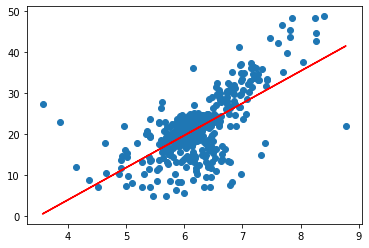

In [57]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color='r')

In [67]:
y_predict = reg.predict(x_train)

In [68]:
y_predict

array([22.40205638, 14.69055825, 29.6654858 , 17.35538788, 33.58019127,
       23.95064468, 22.07190049, 18.23580357, 25.84511058, 20.60192073,
       17.44971813, 26.3246227 , 21.60811009, 15.08360097,  9.10935166,
       17.11170139, 28.73004413, 24.80747781, 17.79559572, 19.99663494,
       24.13144433, 21.45875385, 25.41276359, 25.21624223, 14.2346287 ,
       24.46946107, 28.96586976, 21.3644236 , 19.73722675, 29.82270289,
       27.55091598, 28.72218328, 21.51377983, 17.99997794, 14.98140986,
       27.22862095, 38.55611208, 18.05500392, 21.3644236 , 20.98710259,
       17.39469215, 17.2138925 , 27.18145582, 20.38181681, 25.75864119,
       18.7467591 , 18.42446407, 27.18145582, 16.24700741, 20.34251253,
       23.4318283 , 18.88039362, 22.07976135, 21.0892937 , 26.61547431,
       22.15836989, 19.87086127, 27.67668965, 21.05785028, 19.12408011,
       17.05667541, 28.25839287, 23.59690624, 12.12791973, 20.59405987,
       22.33916954, 18.79392423, 22.8972902 , 21.8989617 , 18.40

## MSE

In [58]:
mse_test = np.sum((y_predict - y_test)**2) /len(y_test)
mse_test

350.6117346938775

## RMSE

In [59]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

18.724629093626326

## MAE

In [65]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)
mae_test

16.976530612244897

In [61]:

from KNN.metrics import mean_absolute_error
from KNN.metrics import root_mean_squard_error


## scikit-learn中的MSE MAE

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [66]:
mean_squared_error(y_test,y_predict)

TypeError: Singleton array 5.2 cannot be considered a valid collection.

# R Square

In [64]:
1- mean_squared_error(y_test,y_predict) / np.var(y_test)

TypeError: Singleton array 5.2 cannot be considered a valid collection.